Combine the data analysis with Power BI 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("Dataset salary 2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [22]:
df.columns
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


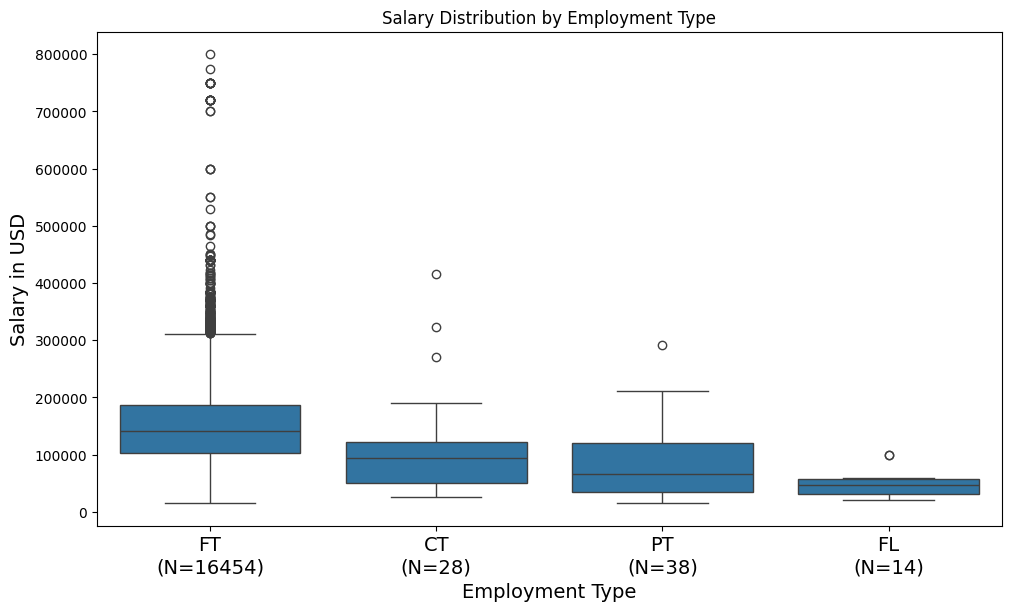

In [23]:
employment_counts = df['employment_type'].value_counts().sort_index()
df['employment_type_with_count'] = df['employment_type'].map(lambda x: f"{x}\n(N={employment_counts[x]})")
plt.figure(figsize=(10, 6),layout='constrained')
ax=sns.boxplot(x='employment_type_with_count', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type',fontsize=14)
plt.ylabel('Salary in USD',fontsize=14)
ax.tick_params(axis='x', labelsize=14)
plt.show()

In [ ]:
average_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_countries = average_salary_by_country.head(10)
top_10_countries = top_10_countries.reset_index()
print(top_10_countries.head())

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='company_location', data=top_10_countries, palette='viridis')
plt.title('Top 10 company location by Average Salary')
plt.xlabel('Average Salary in USD')
plt.ylabel('Locations')
plt.show()